# Key Data on Health and Health Care by Race and Ethnicity in 2022

https://www.kff.org/racial-equity-and-health-policy/report/key-data-on-health-and-health-care-by-race-and-ethnicity/

<details><summary><h2>Contents</h2></summary>

[**1. Introduction**](#introduction)

[**2. Loading the data**](#data_loading)
* [2.1. Loading libraries and reading the data](#loading)
* [2.2. Data size and structure of the datasets](#data_loading)

[**3. Background: Racial diversity within the U.S. today**](#racial_diversity)

[**4. Health coverage, Access, and Use of care**](#coverage_access_useofcare)
* [4.1. Uninsured rate](#2.1-loading)
* [4.2. Access to a personal health care provider](#2.1-loading)
* [4.3. Access to a usual source of care when sick](#2.1-loading)
* [4.4. Access to mental health services](#2.1-loading)
* [4.5. Access to a usual source of care when sick](#2.1-loading)
* [4.6. Access to at least one dose of the COVID-19 vaccines](#2.1-loading)

[**5. Health status, outcomes and behaviours**](#2-racial_diversity)
* [5.1. Life expectancy](#2.1-loading)
* [5.2. Self-reported health status](#2.1-loading)
* [5.3. Birth risks and outcomes](#2.1-loading)
* [5.4. HIV, AIDS diagnosis and deaths](#2.1-loading)
* [5.5. Chronic disease and cancer](#2.1-loading)
* [5.3. COVID-19 cases, hospitalisations and deaths](#2.1-loading)
* [5.3. Smoking and obesity](#2.1-loading)
* [5.3. Mental heath and substance use disorders](#2.1-loading)
* [5.3. Suicide death rates](#2.1-loading)

[**6. Social determinants of health**](#2-racial_diversity)
* [6.1. Work status, family income and education](#2.1-loading)
* [6.1. Assets and debt](#2.1-loading)
* [6.1. Food security, housing and internet access](#2.1-loading)
* [6.1. Transportation](#2.1-loading)
* [6.1. Citizenship and language](#2.1-loading)
* [6.1. Racism and adverse childhood experiences](#2.1-loading)

</details>

<a name="introduction"></a>
<details><summary><h2>1. Introduction</h2></summary>

Racial and ethnic disparities in health and health care remain a persistent challenge in the United States. The COVID-19 pandemic’s uneven impact for people of color drew increased attention to inequities in health and health care, but they have been documented for decades and reflect longstanding structural and systemic inequities rooted in racism and discrimination. While inequities in access to and use of health care contribute to disparities in health, inequities across broader social and economic factors that drive health, often referred to as social determinants of health, also play a major role. Using data to identify disparities and the factors that drive them is important for developing interventions and directing resources to address them as well as for assessing progress toward achieving greater equity over time.

This analysis examines how people of color fared compared to White people across a broad range of measures of health, health care, and social determinants of health. Where possible, we present data for six groups: White, Asian, Hispanic, Black, American Indian and Alaska Native (AIAN), and Native Hawaiian and Other Pacific Islander (NHOPI). People of Hispanic origin may be of any race, but we classify them as Hispanic for this analysis. We limit other groups to people who identify as non-Hispanic. Unless otherwise noted, differences described in the text are statistically significant at the p<0.05 level. We use the most recent data available from several federal survey and administrative datasets (see Methodology). When the same or similar measures are available in multiple datasets, we use the data that allows us to disaggregate for the largest number of racial/ethnic groups.

Overall, this analysis found that Black, Hispanic, and AIAN people fared worse than White people across the majority of examined measures of health and health care and social determinants of health. Black people fared better than White people for some cancer screening and incidence measures, although they have higher rates of cancer mortality Despite worse measures of health coverage and access and social determinants of health, Hispanic people fared better than White people for some health measures, including life expectancy, some chronic diseases, and most measures of cancer incidence and mortality. These findings may, in part, have reflected variation in outcomes among subgroups of Hispanic people, with better outcomes for some groups, particularly recent immigrants to the U.S. 

Overall, these data showed that people of color fared worse compared to White people across a broad range of measures related to health and health care, particularly Black, Hispanic, and AIAN people. However, patterns varied across measures and groups and there were likely variations in measures within the broad racial and ethnic classifications used for this analysis. Many of these disparities placed people of color at increased risk for negative health and economic impacts from the COVID-19 pandemic. Moreover, the pandemic exacerbated many of these disparities and may contribute to widening disparities in the future.

These data highlighted the importance of continuing efforts to address disparities in health and health care and show that it will be key for such efforts to address factors both within and beyond the health care system. While these data have provided insight into the status of disparities, ongoing data gaps and limitations hamper the ability to get a complete picture, particularly for smaller population groups and among subgroups of the broader racial and ethnic categories. As the share of people who identify as multiracial grows, it also will be important to develop improved methods for understanding their experiences. Going forward, reassessment of how data are collected and reported by race/ethnicity will be important for providing more nuanced understanding of disparities and, in turn, improved efforts to address them.

<a name="data_loading"></a>
## 2. Loading the data

In [453]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Stop scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

https://www.census.gov/data/datasets/time-series/demo/popest/2020s-state-detail.html

https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2020-2022/sc-est2022-alldata6.pdf # file layout

General population characteristics by States

In [465]:
all_us = pd.read_csv('sc-est2022-alldata6.csv').reset_index(drop = True)
all_us = all_us.drop(columns = {'SUMLEV', 'SEX', 'ORIGIN'})
all_us['RACE'] = all_us['RACE'].astype(str)
all_us['RACE'] = all_us['RACE'].replace({
    '1': 'White',
    '2': 'Black',
    '3': 'AIAN',
    '4': 'Asian',
    '5': 'NHOPI', 
    '6': '>1 race'
})
all_us.head()

,REGION,DIVISION,STATE,NAME,RACE,AGE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022
0,3,6,1,Alabama,White,0,34498,34625,35016,35730
1,3,6,1,Alabama,White,1,35671,35326,35056,35418
2,3,6,1,Alabama,White,2,36934,36715,35637,35532
3,3,6,1,Alabama,White,3,37876,37558,37165,36059
4,3,6,1,Alabama,White,4,38814,38778,37968,37602


<a name="racial_diversity"></a>
## 3. Background: Racial diversity within the U.S. today

In [455]:
race_total = all_us.groupby('RACE')[['POPESTIMATE2022']].sum()
race_total = race_total.reset_index()

race_total

,RACE,POPESTIMATE2022
0,>1 race,40282628
1,AIAN,17528936
2,Asian,83815764
3,Black,181598972
4,NHOPI,3515232
5,White,1006408696


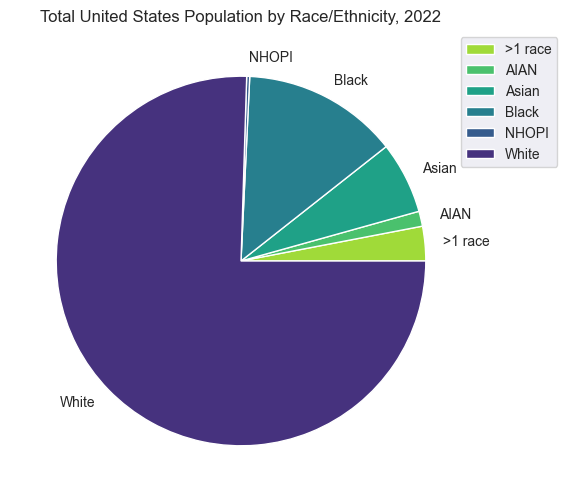

In [456]:
sns.set_style('darkgrid')
sns.set_palette('viridis_r')
plt.figure(figsize = (6, 6));

plt.pie(
    x = race_total['POPESTIMATE2022'],
    startangle = 0,
    labels = race_total['RACE'],
    textprops = {'fontsize': 10},    
)
plt.legend(bbox_to_anchor = (1.2, 1))
plt.title('Total United States Population by Race/Ethnicity, 2022');

**Among individuals identifying with a single race, the largest group is composed of White individuals, constituting approximately 54.82% of this demographic**. Following this, Black individuals make up a significant portion, accounting for around 10.99%. The American Indian and Alaska Native (AIAN) community is represented by approximately 0.87%, while the Asian population amounts to about 5.32%. The Native Hawaiian and Other Pacific Islander (NHOPI) community has a smaller presence, accounting for approximately 0.18%, and the Other category comprises around 6.61%. This data underscores the diverse and varied demographic landscape within single-race populations, emphasizing the substantial proportional presence of each ethnic group.

In [457]:
states_poc = all_us[['RACE', 'NAME', 'POPESTIMATE2022']]
states_poc = pd.pivot_table(states_poc, columns = 'RACE', index = 'NAME', values = 'POPESTIMATE2022')
states_poc['POC (%)'] = states_poc[['AIAN', 'Asian', 'Black', 'NHOPI']].sum(axis = 1) / states_poc.loc[:].sum(axis = 1) * 100
states_poc = states_poc.iloc[:, -1].reset_index()
states_poc.head()

,NAME,POC (%)
0,Alabama,29.19
1,Alaska,27.76
2,Arizona,14.93
3,Arkansas,19.05
4,California,25.00


In [458]:
# Mapping of full state names to code names
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [459]:
states_poc['Code Name'] = states_poc['NAME'].map(us_state_to_abbrev)

fig  =  px.choropleth(
    states_poc, 
    locations = 'Code Name',
    locationmode = 'USA-states',
    color = 'POC (%)',
    color_continuous_scale = 'viridis',
    title = 'Share of POC per State in the U.S.',
    labels = {'POC (%)': 'Percentage of POC'},
    hover_data = ['NAME'],  
    scope = 'usa',
)

fig.update_traces(
    marker_line_color='white',
    marker_line_width=1,
    hovertemplate='<b>%{customdata[0]}</b><br>POC: %{z:.2f}%'
)

fig.show()

POC representation varies, ranging from below 10% in states such as Maine, Vermont, and West Virginia to exceeding 50% in California, the District of Columbia, Hawaii, Maryland, Nevada, New Mexico, and Texas. 
* Specifically, a significant portion of the Black population, comprising 59%, resides in Southern states, while nearly eight in ten Hispanic individuals live in either the Western (39%) or Southern (38%) regions. 
* A substantial percentage of the Native Hawaiian and Other Pacific Islander (NHOPI) population, at 76%, and almost half (48%) of the American Indian and Alaska Native (AIAN) population, are situated in the Western region. 
* 44% of the Asian population resides in the Western part of the country.

In [463]:
age = all_us.groupby(['RACE', 'AGE'])['POPESTIMATE2022'].value_counts().reset_index()

age.head()

,RACE,AGE,POPESTIMATE2022,count
0,>1 race,0,42,4
1,>1 race,0,118,4
2,>1 race,0,262,3
3,>1 race,0,3627,2
4,>1 race,0,387,2


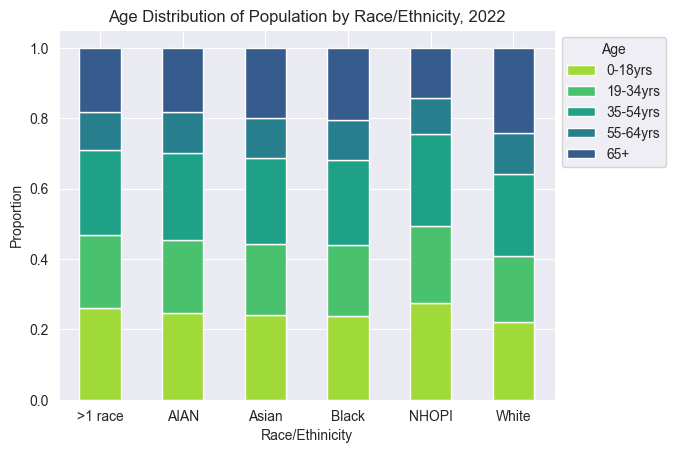

In [464]:
bins = [0, 19, 35, 55, 65, float('inf')]
labels = ['0-18yrs', '19-34yrs', '35-54yrs', '55-64yrs', '65+']

# Create 'AGE_BIN' column based on the bins and labels
age_plot = (
    age[['RACE', 'AGE', 'count']]
    .assign(AGE_BIN = pd.cut(age['AGE'], bins = bins, labels = labels, right = False))
    .groupby('RACE')['AGE_BIN']
    .value_counts(normalize=True)
    .unstack()
)

age_plot.plot(
    kind = 'bar',
    stacked = True,
    rot = 0
)

plt.xlabel('Race/Ethinicity')
plt.ylabel('Proportion')
plt.legend(title = 'Age', bbox_to_anchor = (1, 1));
plt.title("Age Distribution of Population by Race/Ethnicity, 2022");

**Generally, people of color exhibit a younger population compared to White individuals.** Within the younger demographic, the Native Hawaiian and Other Pacific Islander (NHOPI) category has a higher percentage in the 0-18 years age group compared to other racial categories. The percentages in the 35-54 years age group exhibit relative consistency across racial categories, indicating a similar distribution of individuals in their middle years.

Both the Asian and Black racial categories display similar age distributions, with slightly higher percentages in the 65+ age group compared to some other racial categories. A noticeable distinction arises in the percentage of individuals in the 65+ age group between racial categories. White individuals present a significantly higher percentage in the 65+ age group compared to other races, indicating an older population.

<a name="coverage_access_useofcare"></a>
## 4. Health coverage, Access, and Use of care

https://www.census.gov/library/publications/2023/demo/p60-281.html

In [580]:
health = pd.read_csv('hic09_acs.csv', header = 3).reset_index(drop = True)
health = health.loc[:, ~health.columns.str.contains('Unnamed: |Margin of Error 2')] #!!!!!!!!!!!!!!!!!!!!!

health = health.rename(columns = {
    '2020 3 Uninsured': '2020 Uninsured'
})

health = health.iloc[:-7] # Remove footnootes row
health = health.drop(index = 0) # Remove NaN row


health['2020 Uninsured'].replace('N', np.nan, inplace = True)
health.iloc[:, 1:] = health.iloc[:, 1:].replace(',', '', regex = True).astype(float)
health['2020 Uninsured'] = health.apply(lambda group: group.interpolate(method='linear'))

health

ValueError: Columns must be same length as key

<a name="data_loading"></a>
## 2. Loading the data

In [ ]:
health[['2020 Uninsured']] = health[['2020 Uninsured']].interpolate(axis = 1, method = 'linear')


<a name="data_loading"></a>
## 2. Loading the data

<a name="data_loading"></a>
## 2. Loading the data

<a name="data_loading"></a>
## 2. Loading the data

<a name="data_loading"></a>
## 2. Loading the data

<a name="data_loading"></a>
## 2. Loading the data

<a name="data_loading"></a>
## 2. Loading the data